# Algebraic Structures: Groups, Rings, and Fields

## Introduction

Algebraic structures form the foundation of abstract algebra, providing a unified framework for studying mathematical operations and their properties. This notebook explores three fundamental algebraic structures: **groups**, **rings**, and **fields**.

## 1. Groups

A **group** $(G, \cdot)$ is a set $G$ equipped with a binary operation $\cdot : G \times G \to G$ satisfying:

1. **Closure:** For all $a, b \in G$, we have $a \cdot b \in G$
2. **Associativity:** For all $a, b, c \in G$, $(a \cdot b) \cdot c = a \cdot (b \cdot c)$
3. **Identity:** There exists $e \in G$ such that $e \cdot a = a \cdot e = a$ for all $a \in G$
4. **Inverse:** For each $a \in G$, there exists $a^{-1} \in G$ such that $a \cdot a^{-1} = a^{-1} \cdot a = e$

If additionally $a \cdot b = b \cdot a$ for all $a, b \in G$, the group is called **abelian** (or commutative).

### Example: Cyclic Groups $\mathbb{Z}_n$

The integers modulo $n$ form a cyclic group under addition:
$$\mathbb{Z}_n = \{0, 1, 2, \ldots, n-1\}$$
with operation $a +_n b = (a + b) \mod n$.

## 2. Rings

A **ring** $(R, +, \cdot)$ is a set $R$ with two binary operations satisfying:

1. $(R, +)$ is an abelian group
2. $(R, \cdot)$ is a monoid (associative with identity)
3. **Distributivity:** For all $a, b, c \in R$:
   - $a \cdot (b + c) = a \cdot b + a \cdot c$ (left distributivity)
   - $(a + b) \cdot c = a \cdot c + b \cdot c$ (right distributivity)

### Example: Ring of Integers $\mathbb{Z}$

The integers form a commutative ring with unity under standard addition and multiplication.

## 3. Fields

A **field** $(F, +, \cdot)$ is a commutative ring where every nonzero element has a multiplicative inverse:
$$\forall a \in F \setminus \{0\}, \exists a^{-1} \in F : a \cdot a^{-1} = 1$$

### Example: Finite Fields $\mathbb{F}_p$

For prime $p$, the integers modulo $p$ form a finite field:
$$\mathbb{F}_p = \{0, 1, 2, \ldots, p-1\}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Set up matplotlib for publication-quality figures
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13

## Implementing Algebraic Structures

We now implement classes to represent and verify properties of these algebraic structures.

In [2]:
class CyclicGroup:
    """Implementation of the cyclic group Z_n under addition modulo n."""
    
    def __init__(self, n):
        self.n = n
        self.elements = list(range(n))
        self.identity = 0
    
    def operate(self, a, b):
        """Group operation: addition modulo n."""
        return (a + b) % self.n
    
    def inverse(self, a):
        """Compute the inverse of element a."""
        return (self.n - a) % self.n
    
    def cayley_table(self):
        """Generate the Cayley (multiplication) table."""
        table = np.zeros((self.n, self.n), dtype=int)
        for i, a in enumerate(self.elements):
            for j, b in enumerate(self.elements):
                table[i, j] = self.operate(a, b)
        return table
    
    def verify_group_axioms(self):
        """Verify all group axioms hold."""
        # Closure (automatic by modular arithmetic)
        closure = all(
            self.operate(a, b) in self.elements
            for a, b in product(self.elements, repeat=2)
        )
        
        # Associativity
        associativity = all(
            self.operate(self.operate(a, b), c) == self.operate(a, self.operate(b, c))
            for a, b, c in product(self.elements, repeat=3)
        )
        
        # Identity
        identity = all(
            self.operate(self.identity, a) == a and self.operate(a, self.identity) == a
            for a in self.elements
        )
        
        # Inverse
        inverse = all(
            self.operate(a, self.inverse(a)) == self.identity
            for a in self.elements
        )
        
        return {'closure': closure, 'associativity': associativity, 
                'identity': identity, 'inverse': inverse}

# Demonstrate with Z_6
Z6 = CyclicGroup(6)
print(f"Cyclic Group Z_6")
print(f"Elements: {Z6.elements}")
print(f"Identity: {Z6.identity}")
print(f"\nInverses:")
for a in Z6.elements:
    print(f"  {a}^(-1) = {Z6.inverse(a)}")
print(f"\nGroup Axioms Verified: {Z6.verify_group_axioms()}")

Cyclic Group Z_6
Elements: [0, 1, 2, 3, 4, 5]
Identity: 0

Inverses:
  0^(-1) = 0
  1^(-1) = 5
  2^(-1) = 4
  3^(-1) = 3
  4^(-1) = 2
  5^(-1) = 1

Group Axioms Verified: {'closure': True, 'associativity': True, 'identity': True, 'inverse': True}


In [3]:
class FiniteField:
    """Implementation of finite field F_p for prime p."""
    
    def __init__(self, p):
        if not self._is_prime(p):
            raise ValueError(f"{p} is not prime")
        self.p = p
        self.elements = list(range(p))
        self.additive_identity = 0
        self.multiplicative_identity = 1
    
    @staticmethod
    def _is_prime(n):
        if n < 2:
            return False
        for i in range(2, int(n**0.5) + 1):
            if n % i == 0:
                return False
        return True
    
    def add(self, a, b):
        """Field addition."""
        return (a + b) % self.p
    
    def multiply(self, a, b):
        """Field multiplication."""
        return (a * b) % self.p
    
    def additive_inverse(self, a):
        """Compute -a in the field."""
        return (self.p - a) % self.p
    
    def multiplicative_inverse(self, a):
        """Compute a^(-1) using extended Euclidean algorithm."""
        if a == 0:
            raise ValueError("Zero has no multiplicative inverse")
        # Using Fermat's little theorem: a^(-1) = a^(p-2) mod p
        return pow(a, self.p - 2, self.p)
    
    def addition_table(self):
        """Generate addition table."""
        table = np.zeros((self.p, self.p), dtype=int)
        for i, a in enumerate(self.elements):
            for j, b in enumerate(self.elements):
                table[i, j] = self.add(a, b)
        return table
    
    def multiplication_table(self):
        """Generate multiplication table."""
        table = np.zeros((self.p, self.p), dtype=int)
        for i, a in enumerate(self.elements):
            for j, b in enumerate(self.elements):
                table[i, j] = self.multiply(a, b)
        return table

# Demonstrate with F_7
F7 = FiniteField(7)
print(f"Finite Field F_7")
print(f"Elements: {F7.elements}")
print(f"\nMultiplicative Inverses:")
for a in F7.elements[1:]:  # Skip 0
    inv = F7.multiplicative_inverse(a)
    print(f"  {a}^(-1) = {inv}  (verify: {a} × {inv} = {F7.multiply(a, inv)})")

Finite Field F_7
Elements: [0, 1, 2, 3, 4, 5, 6]

Multiplicative Inverses:
  1^(-1) = 1  (verify: 1 × 1 = 1)
  2^(-1) = 4  (verify: 2 × 4 = 1)
  3^(-1) = 5  (verify: 3 × 5 = 1)
  4^(-1) = 2  (verify: 4 × 2 = 1)
  5^(-1) = 3  (verify: 5 × 3 = 1)
  6^(-1) = 6  (verify: 6 × 6 = 1)


## Visualizing Algebraic Structures

### Cayley Tables

A **Cayley table** (or operation table) displays all products in a finite algebraic structure. For a group $G$, the entry at row $a$ and column $b$ gives $a \cdot b$.

Key properties visible in Cayley tables:
- **Latin square property:** Each element appears exactly once in each row and column (group property)
- **Commutativity:** Table is symmetric about the diagonal (abelian groups)

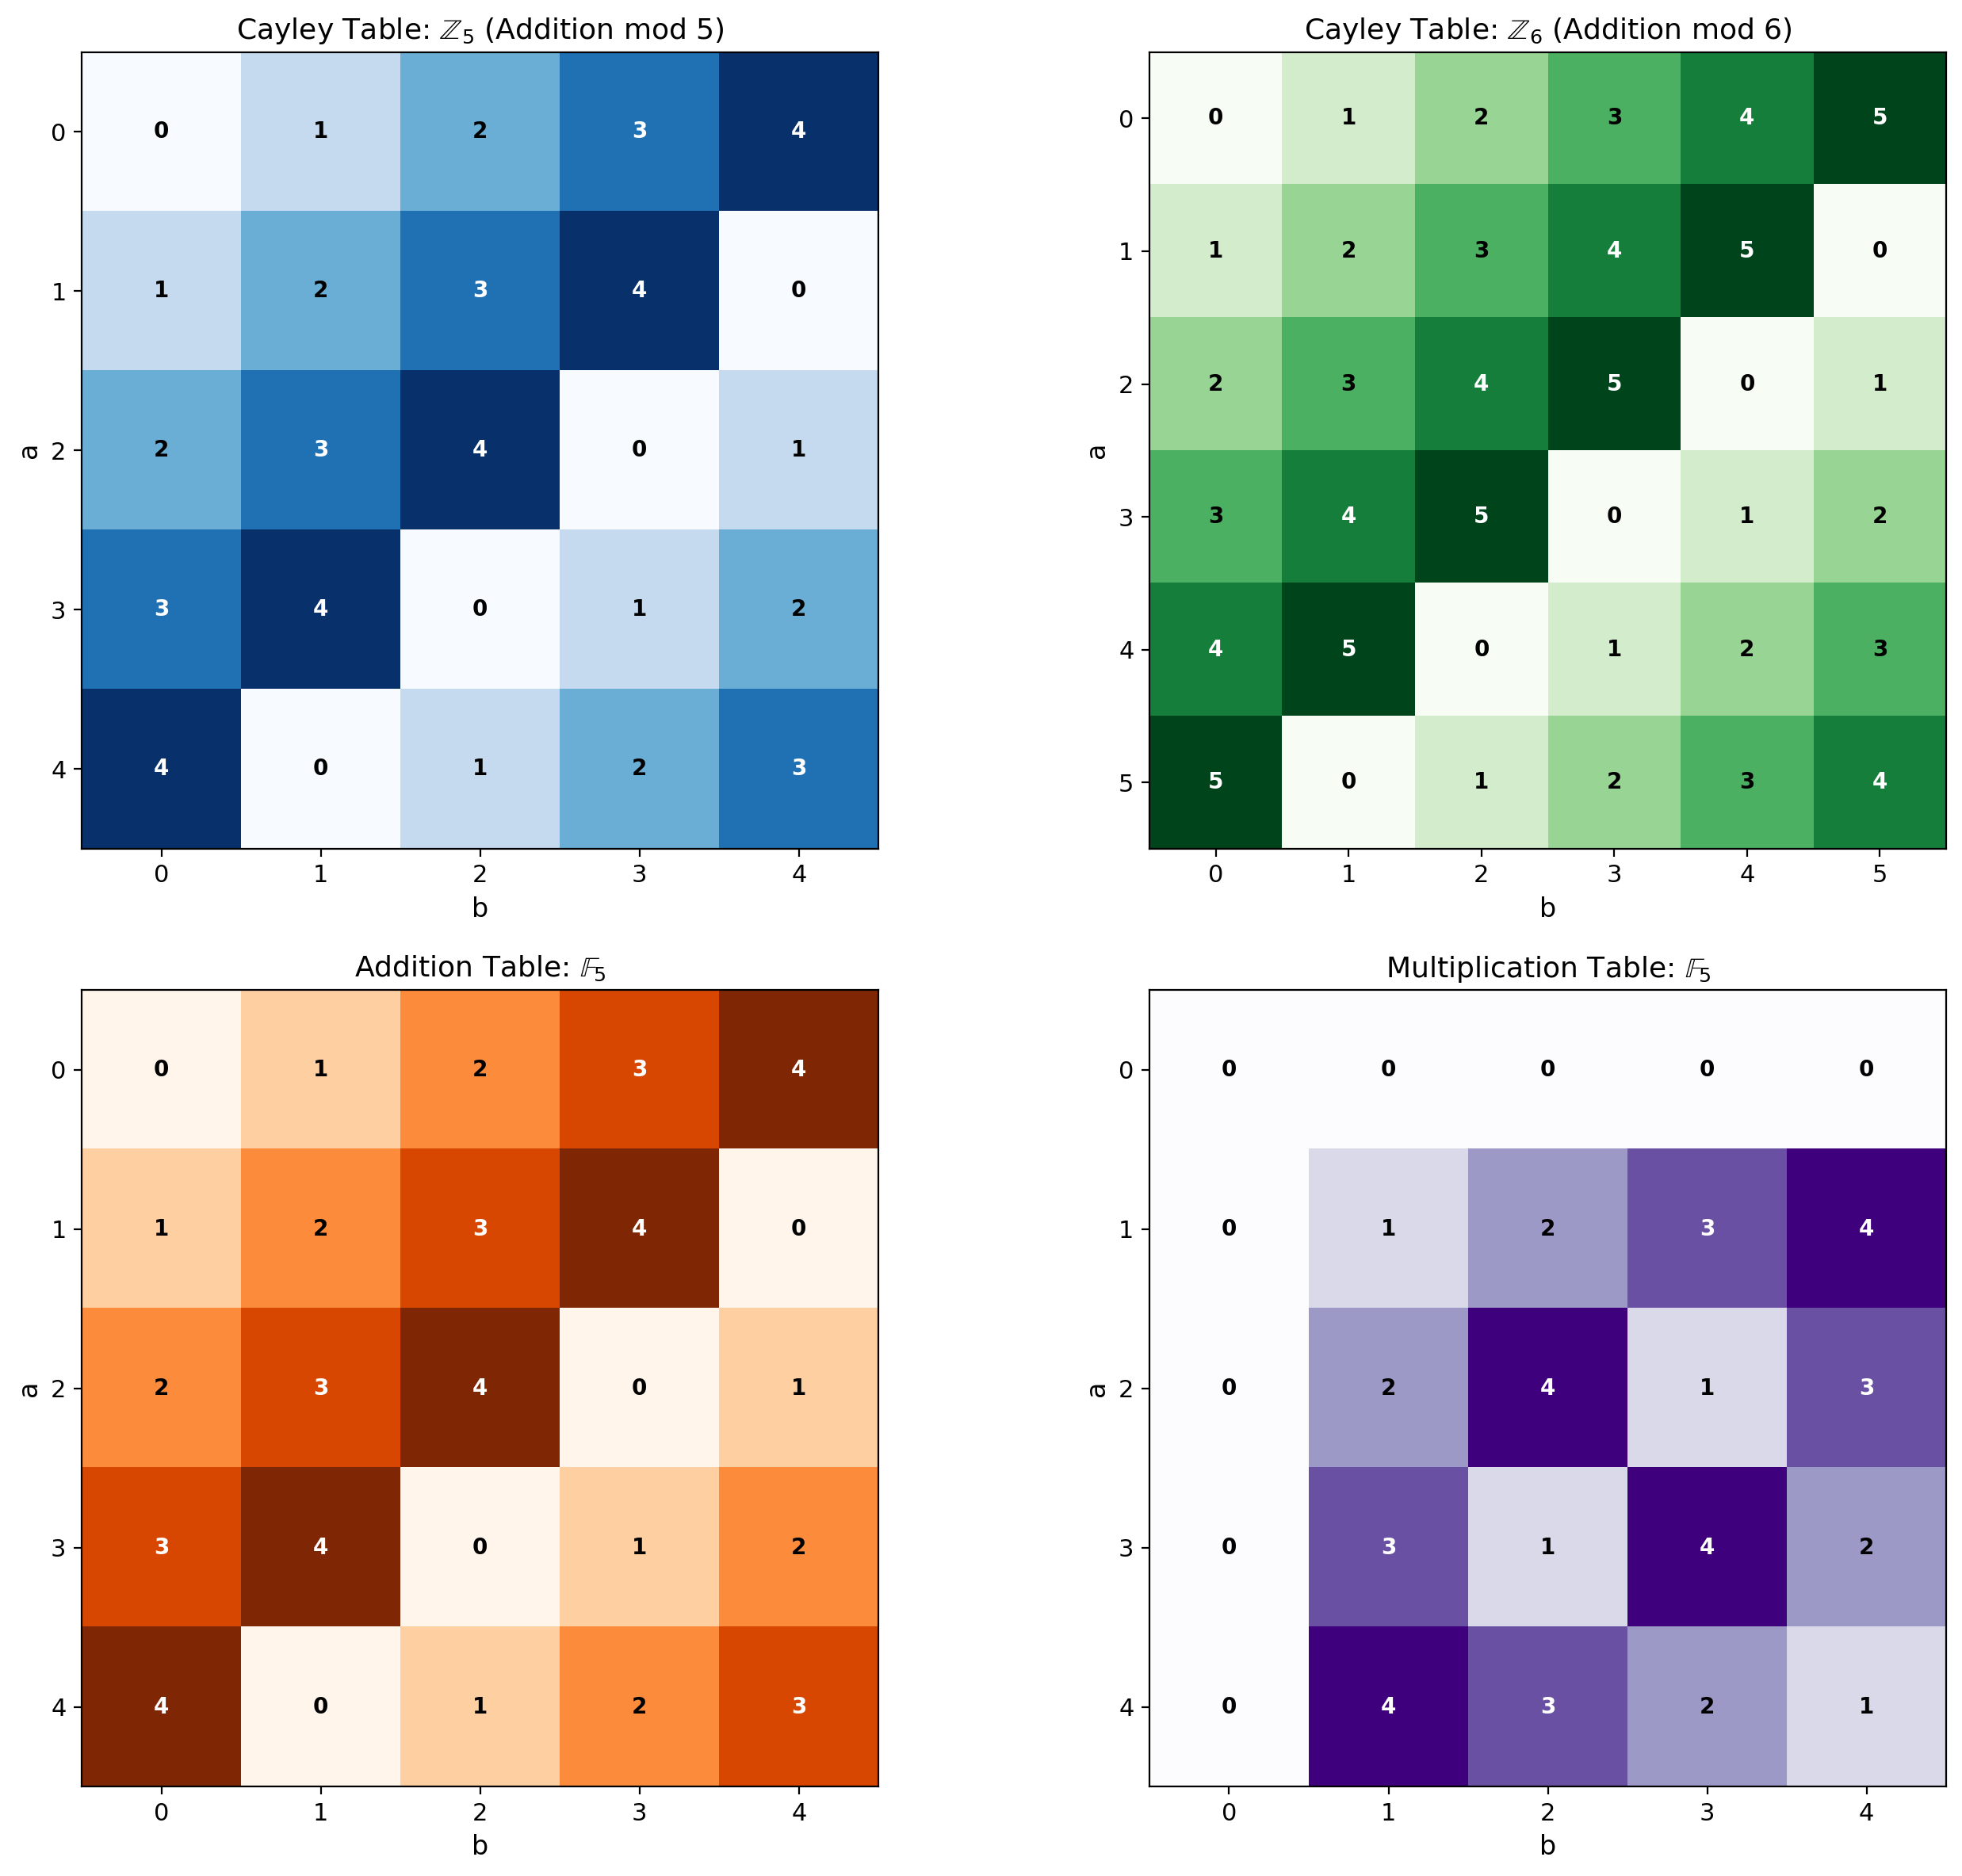

Plot saved to plot.png


In [4]:
def plot_cayley_table(table, title, elements, ax, cmap='viridis'):
    """Visualize a Cayley table as a heatmap."""
    n = len(elements)
    im = ax.imshow(table, cmap=cmap, aspect='equal')
    
    # Add text annotations
    for i in range(n):
        for j in range(n):
            text_color = 'white' if table[i, j] > n/2 else 'black'
            ax.text(j, i, str(table[i, j]), ha='center', va='center', 
                   fontsize=10, color=text_color, fontweight='bold')
    
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels(elements)
    ax.set_yticklabels(elements)
    ax.set_xlabel('b')
    ax.set_ylabel('a')
    ax.set_title(title)
    
    return im

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Z_5 Cayley table (cyclic group)
Z5 = CyclicGroup(5)
plot_cayley_table(Z5.cayley_table(), 
                  r'Cayley Table: $\mathbb{Z}_5$ (Addition mod 5)', 
                  Z5.elements, axes[0, 0], cmap='Blues')

# Z_6 Cayley table
plot_cayley_table(Z6.cayley_table(), 
                  r'Cayley Table: $\mathbb{Z}_6$ (Addition mod 6)', 
                  Z6.elements, axes[0, 1], cmap='Greens')

# F_5 addition table
F5 = FiniteField(5)
plot_cayley_table(F5.addition_table(), 
                  r'Addition Table: $\mathbb{F}_5$', 
                  F5.elements, axes[1, 0], cmap='Oranges')

# F_5 multiplication table
plot_cayley_table(F5.multiplication_table(), 
                  r'Multiplication Table: $\mathbb{F}_5$', 
                  F5.elements, axes[1, 1], cmap='Purples')

plt.tight_layout()
plt.savefig('algebraic_structures_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to plot.png")

## Group Homomorphisms

A **homomorphism** $\phi: G \to H$ between groups is a function that preserves the group operation:
$$\phi(a \cdot_G b) = \phi(a) \cdot_H \phi(b)$$

Key properties of homomorphisms:
- $\phi(e_G) = e_H$ (identity maps to identity)
- $\phi(a^{-1}) = \phi(a)^{-1}$ (inverses are preserved)

The **kernel** of $\phi$ is $\ker(\phi) = \{a \in G : \phi(a) = e_H\}$, which is always a normal subgroup of $G$.

In [5]:
def homomorphism_Z6_to_Z2(x):
    """Natural homomorphism from Z_6 to Z_2 (parity map)."""
    return x % 2

def verify_homomorphism(G, H, phi):
    """Verify that phi is a valid group homomorphism."""
    for a in G.elements:
        for b in G.elements:
            lhs = phi(G.operate(a, b))
            rhs = H.operate(phi(a), phi(b))
            if lhs != rhs:
                return False
    return True

Z2 = CyclicGroup(2)

print("Homomorphism φ: Z_6 → Z_2 (mod 2)")
print("="*40)
print("\nMapping:")
for x in Z6.elements:
    print(f"  φ({x}) = {homomorphism_Z6_to_Z2(x)}")

is_hom = verify_homomorphism(Z6, Z2, homomorphism_Z6_to_Z2)
print(f"\nIs valid homomorphism: {is_hom}")

# Find kernel
kernel = [x for x in Z6.elements if homomorphism_Z6_to_Z2(x) == Z2.identity]
print(f"Kernel: {kernel}")
print(f"ker(φ) = {{{', '.join(map(str, kernel))}}} = {len(kernel)}Z_6")

Homomorphism φ: Z_6 → Z_2 (mod 2)

Mapping:
  φ(0) = 0
  φ(1) = 1
  φ(2) = 0
  φ(3) = 1
  φ(4) = 0
  φ(5) = 1

Is valid homomorphism: True
Kernel: [0, 2, 4]
ker(φ) = {0, 2, 4} = 3Z_6


## Subgroups and Lagrange's Theorem

A **subgroup** $H$ of a group $G$ is a subset that forms a group under the same operation.

**Lagrange's Theorem:** For a finite group $G$ and subgroup $H$:
$$|H| \text{ divides } |G|$$

The quotient $|G|/|H|$ is called the **index** of $H$ in $G$.

In [6]:
def find_subgroups(G):
    """Find all subgroups of a cyclic group."""
    subgroups = []
    n = G.n
    
    # Divisors of n give subgroup orders
    divisors = [d for d in range(1, n+1) if n % d == 0]
    
    for d in divisors:
        # Subgroup of order d generated by n/d
        generator = n // d
        subgroup = set()
        element = 0
        for _ in range(d):
            subgroup.add(element)
            element = G.operate(element, generator)
        subgroups.append(sorted(subgroup))
    
    return subgroups

print("Subgroups of Z_12")
print("="*40)
Z12 = CyclicGroup(12)
subgroups = find_subgroups(Z12)

for H in subgroups:
    index = Z12.n // len(H)
    print(f"H = {{{', '.join(map(str, H))}}}, |H| = {len(H)}, [Z_12 : H] = {index}")

print(f"\nLagrange's Theorem verified: All subgroup orders {[len(H) for H in subgroups]} divide 12")

Subgroups of Z_12
H = {0}, |H| = 1, [Z_12 : H] = 12
H = {0, 6}, |H| = 2, [Z_12 : H] = 6
H = {0, 4, 8}, |H| = 3, [Z_12 : H] = 4
H = {0, 3, 6, 9}, |H| = 4, [Z_12 : H] = 3
H = {0, 2, 4, 6, 8, 10}, |H| = 6, [Z_12 : H] = 2
H = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}, |H| = 12, [Z_12 : H] = 1

Lagrange's Theorem verified: All subgroup orders [1, 2, 3, 4, 6, 12] divide 12


## Ring Structure: Polynomial Rings

A **polynomial ring** $R[x]$ consists of all polynomials with coefficients in ring $R$:
$$f(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_1 x + a_0, \quad a_i \in R$$

With coefficient-wise addition and convolution for multiplication, $R[x]$ inherits the ring structure of $R$.

In [7]:
class PolynomialRing:
    """Polynomial ring over a finite field."""
    
    def __init__(self, field):
        self.field = field
    
    def add(self, p, q):
        """Add two polynomials (coefficient arrays)."""
        max_len = max(len(p), len(q))
        p_padded = list(p) + [0] * (max_len - len(p))
        q_padded = list(q) + [0] * (max_len - len(q))
        return [self.field.add(a, b) for a, b in zip(p_padded, q_padded)]
    
    def multiply(self, p, q):
        """Multiply two polynomials."""
        result = [0] * (len(p) + len(q) - 1)
        for i, a in enumerate(p):
            for j, b in enumerate(q):
                result[i + j] = self.field.add(
                    result[i + j], 
                    self.field.multiply(a, b)
                )
        return result
    
    def format_polynomial(self, p):
        """Format polynomial for display."""
        terms = []
        for i, coef in enumerate(p):
            if coef != 0:
                if i == 0:
                    terms.append(str(coef))
                elif i == 1:
                    terms.append(f"{coef}x" if coef != 1 else "x")
                else:
                    terms.append(f"{coef}x^{i}" if coef != 1 else f"x^{i}")
        return " + ".join(terms) if terms else "0"

# Demonstrate polynomial arithmetic over F_5
PR = PolynomialRing(F5)

# p(x) = 2 + 3x + x^2
p = [2, 3, 1]
# q(x) = 1 + 4x
q = [1, 4]

print(f"Polynomial Ring F_5[x]")
print("="*40)
print(f"p(x) = {PR.format_polynomial(p)}")
print(f"q(x) = {PR.format_polynomial(q)}")
print(f"\np(x) + q(x) = {PR.format_polynomial(PR.add(p, q))}")
print(f"p(x) × q(x) = {PR.format_polynomial(PR.multiply(p, q))}")

Polynomial Ring F_5[x]
p(x) = 2 + 3x + x^2
q(x) = 1 + 4x

p(x) + q(x) = 3 + 2x + x^2
p(x) × q(x) = 2 + x + 3x^2 + 4x^3


## The Symmetric Group $S_n$

The **symmetric group** $S_n$ is the group of all permutations of $n$ elements:
$$|S_n| = n!$$

Every permutation can be written as a product of **transpositions** $(i \ j)$.

A permutation is:
- **Even** if it's a product of an even number of transpositions
- **Odd** if it's a product of an odd number of transpositions

The **alternating group** $A_n$ consists of all even permutations, with $|A_n| = n!/2$.

In [8]:
from itertools import permutations

class SymmetricGroup:
    """The symmetric group S_n."""
    
    def __init__(self, n):
        self.n = n
        self.elements = list(permutations(range(n)))
        self.identity = tuple(range(n))
    
    def compose(self, sigma, tau):
        """Compose permutations: (σ ∘ τ)(i) = σ(τ(i))."""
        return tuple(sigma[tau[i]] for i in range(self.n))
    
    def inverse(self, sigma):
        """Compute inverse permutation."""
        inv = [0] * self.n
        for i, s in enumerate(sigma):
            inv[s] = i
        return tuple(inv)
    
    def parity(self, sigma):
        """Compute parity (sign) of permutation."""
        inversions = 0
        for i in range(self.n):
            for j in range(i + 1, self.n):
                if sigma[i] > sigma[j]:
                    inversions += 1
        return 1 if inversions % 2 == 0 else -1
    
    def alternating_group(self):
        """Return elements of the alternating group A_n."""
        return [sigma for sigma in self.elements if self.parity(sigma) == 1]

# Analyze S_3
S3 = SymmetricGroup(3)
print(f"Symmetric Group S_3")
print("="*40)
print(f"|S_3| = {len(S3.elements)} = 3!")

print("\nElements with parity:")
for sigma in S3.elements:
    parity = "even" if S3.parity(sigma) == 1 else "odd"
    print(f"  {sigma} ({parity})")

A3 = S3.alternating_group()
print(f"\nAlternating Group A_3: {A3}")
print(f"|A_3| = {len(A3)} = 3!/2")

Symmetric Group S_3
|S_3| = 6 = 3!

Elements with parity:
  (0, 1, 2) (even)
  (0, 2, 1) (odd)
  (1, 0, 2) (odd)
  (1, 2, 0) (even)
  (2, 0, 1) (even)
  (2, 1, 0) (odd)

Alternating Group A_3: [(0, 1, 2), (1, 2, 0), (2, 0, 1)]
|A_3| = 3 = 3!/2


## Summary

We have explored the fundamental algebraic structures:

| Structure | Operations | Key Properties |
|-----------|------------|----------------|
| **Group** | One (∙) | Closure, associativity, identity, inverses |
| **Ring** | Two (+, ×) | Abelian group under +, monoid under ×, distributivity |
| **Field** | Two (+, ×) | Ring where nonzero elements form multiplicative group |

These structures provide the foundation for:
- Linear algebra (vector spaces over fields)
- Number theory (rings of integers, Galois theory)
- Cryptography (finite fields, discrete logarithms)
- Coding theory (polynomial rings)
- Physics (symmetry groups, Lie algebras)